In [ ]:
import pandas as pd
import numpy as np

from utils.utils_preprocessing import preprocess_data, fill_in_missing_dates
from utils.utils_features import features_time_related, features_lag
from utils.utils_features_old import FeatureEngineeringPipeline
from utils.utils_features_family import ExtractFamilyFeatures

In [72]:
df_sales = pd.read_parquet("data/sales.parquet")
df_products = pd.read_parquet("data/products.parquet")
df = df_sales.merge(df_products, on="product_id")

In [73]:
df

,product_id,fecha,store,quantity,seasonality,brand,family,pvp
0,883A4A2507184C5483FDC9FC7E48240B,2021-03-22,FR,1.0,N-A,adidas,Zapatillas Trail Running,130.00
1,883A4A2507184C5483FDC9FC7E48240B,2021-03-24,ES,1.0,N-A,adidas,Zapatillas Trail Running,130.00
2,883A4A2507184C5483FDC9FC7E48240B,2021-08-27,ES,1.0,N-A,adidas,Zapatillas Trail Running,130.00
3,883A4A2507184C5483FDC9FC7E48240B,2021-06-24,ES,1.0,N-A,adidas,Zapatillas Trail Running,130.00
4,883A4A2507184C5483FDC9FC7E48240B,2021-03-05,IT,1.0,N-A,adidas,Zapatillas Trail Running,130.00
...,...,...,...,...,...,...,...,...
62809,F438E725631D4B72819E4B2E567B7C14,2023-03-29,ES,1.0,N-A,Columbia,Zapatillas de montaña,99.95
62810,70732AD67F17451387FC89F1E576A525,2021-07-05,ES,1.0,N-A,Columbia,Zapatillas de montaña,80.00
62811,622EF83B0C284654A91A8DBFD176471D,2021-07-10,FR,1.0,N-A,Columbia,Zapatillas de montaña,74.95
62812,8349E74BA6BC4940A06DBD3088332A4C,2023-03-03,ES,1.0,N-A,Columbia,Zapatillas de montaña,35.00


In [62]:
df = preprocess_data(df)

In [ ]:
pipeline = FeatureEngineeringPipeline(df, frequency='ME')
df_monthly = pipeline.run()
df_monthly = fill_in_missing_dates(df_monthly, group_col=["brand", "family"], date_col="date", freq="ME")
df_monthly = features_time_related(df_monthly, frequency='ME')
df_monthly = features_lag(
    df=df_monthly, 
    col="total_revenue",
    lags=[12, 13, 14],
    group_column=['brand', 'family']
)

In [68]:
df_monthly

,brand,family,date,total_quantity,total_revenue,avg_pvp,num_stores,store_sales_concentration,avg_sales_per_store,top_store_sales,...,seasonality_ratio_S,seasonality_ratio_W,seasonality_change,year,month_of_year,sin_month_of_year,cos_month_of_year,total_revenue_lag_12,total_revenue_lag_13,total_revenue_lag_14
0,Columbia,Bañadores Natación,2021-09-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,9,-1.000,-0.000,NaN,NaN,NaN
1,Columbia,Bañadores Natación,2021-10-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,10,-0.866,0.500,NaN,NaN,NaN
2,Columbia,Bañadores Natación,2021-11-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,11,-0.500,0.866,NaN,NaN,NaN
3,Columbia,Bañadores Natación,2021-12-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,12,-0.000,1.000,NaN,NaN,NaN
4,Columbia,Bañadores Natación,2022-01-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2022,1,0.500,0.866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,adidas,Zuecos Urban,2024-03-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,3,1.000,0.000,99.949997,99.949997,99.949997
3501,adidas,Zuecos Urban,2024-04-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,4,0.866,-0.500,299.849976,99.949997,99.949997
3502,adidas,Zuecos Urban,2024-05-31,2.0,199.899994,99.949997,2.0,0.69,1.0,1.0,...,0.0,0.0,0.0,2024,5,0.500,-0.866,299.849976,299.849976,99.949997
3503,adidas,Zuecos Urban,2024-06-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,6,0.000,-1.000,299.849976,299.849976,299.849976


In [21]:
# df_daily

In [22]:
# df_weekly

In [23]:
df_monthly

,brand,family,date,total_quantity,total_revenue,avg_pvp,num_stores,store_sales_concentration,avg_sales_per_store,top_store_sales,...,seasonality_ratio_S,seasonality_ratio_W,seasonality_change,year,month_of_year,sin_month_of_year,cos_month_of_year,total_revenue_lag_12,total_revenue_lag_13,total_revenue_lag_14
0,Columbia,Bañadores Natación,2021-09-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,9,-1.000,-0.000,NaN,NaN,NaN
1,Columbia,Bañadores Natación,2021-10-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,10,-0.866,0.500,NaN,NaN,NaN
2,Columbia,Bañadores Natación,2021-11-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,11,-0.500,0.866,NaN,NaN,NaN
3,Columbia,Bañadores Natación,2021-12-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,12,-0.000,1.000,NaN,NaN,NaN
4,Columbia,Bañadores Natación,2022-01-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2022,1,0.500,0.866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,adidas,Zuecos Urban,2024-03-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,3,1.000,0.000,99.949997,99.949997,99.949997
3501,adidas,Zuecos Urban,2024-04-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,4,0.866,-0.500,299.849976,99.949997,99.949997
3502,adidas,Zuecos Urban,2024-05-31,2.0,199.899994,99.949997,2.0,0.69,1.0,1.0,...,0.0,0.0,0.0,2024,5,0.500,-0.866,299.849976,299.849976,99.949997
3503,adidas,Zuecos Urban,2024-06-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,6,0.000,-1.000,299.849976,299.849976,299.849976


In [24]:
df[["brand", "family"]].nunique()

brand      2
family    82
dtype: int64

In [25]:
df[["brand", "family"]].drop_duplicates().shape[0]

109

In [69]:
processor = ExtractFamilyFeatures()
processed_df = processor(df) 

In [70]:
processed_df

,product_id,date,store,quantity,seasonality,brand,family,pvp,clothing_type,sport_category,outlet_flag
0,883A4A2507184C5483FDC9FC7E48240B,2021-03-22,FR,1.0,N-A,adidas,Zapatillas Trail Running,130.000000,zapatillas,trail running,0
1,883A4A2507184C5483FDC9FC7E48240B,2021-03-24,ES,1.0,N-A,adidas,Zapatillas Trail Running,130.000000,zapatillas,trail running,0
2,883A4A2507184C5483FDC9FC7E48240B,2021-08-27,ES,1.0,N-A,adidas,Zapatillas Trail Running,130.000000,zapatillas,trail running,0
3,883A4A2507184C5483FDC9FC7E48240B,2021-06-24,ES,1.0,N-A,adidas,Zapatillas Trail Running,130.000000,zapatillas,trail running,0
4,883A4A2507184C5483FDC9FC7E48240B,2021-03-05,IT,1.0,N-A,adidas,Zapatillas Trail Running,130.000000,zapatillas,trail running,0
...,...,...,...,...,...,...,...,...,...,...,...
62809,F438E725631D4B72819E4B2E567B7C14,2023-03-29,ES,1.0,N-A,Columbia,Zapatillas de montaña,99.949997,zapatillas,de montaña,0
62810,70732AD67F17451387FC89F1E576A525,2021-07-05,ES,1.0,N-A,Columbia,Zapatillas de montaña,80.000000,zapatillas,de montaña,0
62811,622EF83B0C284654A91A8DBFD176471D,2021-07-10,FR,1.0,N-A,Columbia,Zapatillas de montaña,74.949997,zapatillas,de montaña,0
62812,8349E74BA6BC4940A06DBD3088332A4C,2023-03-03,ES,1.0,N-A,Columbia,Zapatillas de montaña,35.000000,zapatillas,de montaña,0


In [71]:
processed_df["sport_category"].value_counts()

sport_category
urban                         19386
running                       15443
outdoor                        9636
de montaña                     8465
training                       4475
trail running                  3453
natación                       1031
unknown                         364
fitness                         165
ciclismo                        149
piscina                          50
esquí                            48
interior urban                   47
homewear                         37
interior y térmica outdoor       21
triatlón running                 20
après-ski                        18
yoga                              6
Name: count, dtype: int64

In [28]:
processed_df[(processed_df["family"] == "Camisetas Urban") & (processed_df["brand"] == "adidas") & (processed_df["date"] == "2021-03-15")]

,product_id,date,store,quantity,seasonality,brand,family,pvp,clothing_type,sport_category,outlet_flag
33619,CAC0119043024EEDB0A8698FA02D2D9C,2021-03-15,ES,1.0,N-A,adidas,Camisetas Urban,50.0,camisetas,urban,0
33624,CAC0119043024EEDB0A8698FA02D2D9C,2021-03-15,ES,1.0,N-A,adidas,Camisetas Urban,50.0,camisetas,urban,0
33625,CAC0119043024EEDB0A8698FA02D2D9C,2021-03-15,ES,1.0,N-A,adidas,Camisetas Urban,50.0,camisetas,urban,0
38090,26A1ABFE556942B9BB8D05702023CA78,2021-03-15,IT,1.0,N-A,adidas,Camisetas Urban,85.0,camisetas,urban,0
62445,689AF1DADA8F489A9BA94379A7D136B1,2021-03-15,ES,1.0,FS,adidas,Camisetas Urban,120.0,camisetas,urban,0


## Model

In [29]:
def train_test_split(df, forecasting_horizon=13, target_col="y"):
    """
    Splits into training and testing set selecting last weeks from 
    the forecasting horizon.
    """

    if "date" in df.columns:
        df = df.set_index("date")
    df = df.sort_index()
    split_date = df.index.max() - pd.DateOffset(weeks=forecasting_horizon - 1)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train = X[X.index < split_date]
    X_test = X[X.index >= split_date]
    y_train = y[y.index < split_date]
    y_test = y[y.index >= split_date]

    return X_train, X_test, y_train, y_test

In [30]:
df_monthly

,brand,family,date,total_quantity,total_revenue,avg_pvp,num_stores,store_sales_concentration,avg_sales_per_store,top_store_sales,...,seasonality_ratio_S,seasonality_ratio_W,seasonality_change,year,month_of_year,sin_month_of_year,cos_month_of_year,total_revenue_lag_12,total_revenue_lag_13,total_revenue_lag_14
0,Columbia,Bañadores Natación,2021-09-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,9,-1.000,-0.000,NaN,NaN,NaN
1,Columbia,Bañadores Natación,2021-10-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,10,-0.866,0.500,NaN,NaN,NaN
2,Columbia,Bañadores Natación,2021-11-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,11,-0.500,0.866,NaN,NaN,NaN
3,Columbia,Bañadores Natación,2021-12-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2021,12,-0.000,1.000,NaN,NaN,NaN
4,Columbia,Bañadores Natación,2022-01-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,1.0,2022,1,0.500,0.866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,adidas,Zuecos Urban,2024-03-31,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,3,1.000,0.000,99.949997,99.949997,99.949997
3501,adidas,Zuecos Urban,2024-04-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,4,0.866,-0.500,299.849976,99.949997,99.949997
3502,adidas,Zuecos Urban,2024-05-31,2.0,199.899994,99.949997,2.0,0.69,1.0,1.0,...,0.0,0.0,0.0,2024,5,0.500,-0.866,299.849976,299.849976,99.949997
3503,adidas,Zuecos Urban,2024-06-30,1.0,99.949997,99.949997,1.0,0.00,1.0,1.0,...,0.0,0.0,0.0,2024,6,0.000,-1.000,299.849976,299.849976,299.849976


In [31]:
cols_categorical = ['brand', 'family', 'mode_seasonality', 'year', 'month_of_year']
cols_numerical = ['num_stores']
for col in cols_categorical:
    df_monthly[col] = df_monthly[col].astype("category")
for col in cols_numerical:
    df_monthly[col] = df_monthly[col].astype("float")
df_monthly = df_monthly.rename(columns={"total_revenue": "y"}).set_index("date")

In [48]:
df_monthly[['brand', 'family']].value_counts().head(50)

brand     family                                
adidas    Camisetas Urban                           49
          Camisetas Training                        49
          Bañadores Natación                        49
          Tops y Sujetadores deportivos Training    49
Columbia  Zapatillas de montaña                     49
          Zapatillas Trail Running                  49
adidas    Camisetas Running                         49
          Zapatillas Running                        49
          Pantalones Urban                          49
          Zapatillas Trail Running                  49
          Mallas y pantalones Training              49
          Zapatillas Urban                          49
Columbia  Camisetas Outdoor                         49
adidas    Zapatillas de montaña                     49
Columbia  Botas de montaña                          49
adidas    Botas de montaña                          48
          Chaquetas Running                         48
          Chánda

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_monthly, forecasting_horizon=54, target_col="y")

In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from utils.utils_models import LightGBMForecastingModel
cv_split = TimeSeriesSplit(n_splits=3, test_size=12)

In [38]:
parameters = {
    'objective': ['regression'],
    "boosting_type": ["gbdt"],
    'metric': ['rmse'],
    'importance_type': ['split'],
    'verbosity': [-1],
    "max_depth": [-1, 1, 3, 4, 5, 6, 10],
    "num_leaves": [10, 20, 30, 40, 100, 120, 150, 200, 250],
    "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    "n_estimators": [50, 100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7, 1, 1.2, 1.5],
    "reg_alpha": [0, 0.01, 1, 2, 5, 7, 10, 50, 100],
    "reg_lambda": [0, 0.01, 1, 5, 10, 20, 50, 100]
}


random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(), 
    cv=cv_split, 
    param_distributions=parameters,
    verbose=1
    )
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/io/config_auto.cpp, line 385 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/io/config_auto.cpp, line 385 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/io/config_auto.cpp, line 385 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/io/config_auto.cpp, line 385 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/io/config_auto.cpp, line 385 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work/LightGBM/LightGBM/lightgbm-python/src/io/config_auto.cpp, line 385 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /Users/runner/work

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=12),
                   estimator=LGBMRegressor(),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.3, 0.5, 0.7, 1,
                                                             1.2, 1.5],
                                        'importance_type': ['split'],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [-1, 1, 3, 4, 5, 6, 10],
                                        'metric': ['rmse'],
                                        'n_estimators': [50, 100, 300, 500, 700,
                                                         900, 1000],
                                        'num_leaves': [10, 20, 30, 40, 100, 120,
                                                       150, 200, 250],
                                        'objective': ['regression'],
                                        'reg_alpha': [0, 0.01, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.01, 1, 5, 10, 20,
                                                       50, 100],
                                        'verbosity': [-1]},
                   verbose=1)

In [39]:
best_model = random_search.best_estimator_
optimal_params = best_model.get_params()

In [40]:
optimal_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.7,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'num_leaves': 150,
 'objective': 'regression',
 'random_state': None,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbosity': -1,
 'metric': 'rmse'}

In [41]:
tss = TimeSeriesSplit(2, test_size=12)

fc_model = LightGBMForecastingModel(hyperparameters=optimal_params)
results_cv = fc_model.cross_validate(df_monthly, n_splits=2)

Train [2021-09-30 - 2023-07-31]
Predict [2020-09-30 - 2024-07-31]
Train [2020-09-30 - 2024-07-31]
Predict [2020-10-31 - 2024-09-30]
Average RMSE from cross-validation: 866.4470


In [43]:
X_test

,brand,family,total_quantity,avg_pvp,num_stores,store_sales_concentration,avg_sales_per_store,top_store_sales,top_3_store_sales,top_store_sales_ratio,...,seasonality_ratio_S,seasonality_ratio_W,seasonality_change,year,month_of_year,sin_month_of_year,cos_month_of_year,total_revenue_lag_12,total_revenue_lag_13,total_revenue_lag_14
date,,,,,,,,,,,,,,,,,,,,,
2023-09-30,adidas,Camisetas Urban,16.0,73.040001,4.0,2.34,1.454545,2.0,6.0,0.12,...,0.00,0.0,0.0,2023,9,-1.0,-0.0,724.549988,1179.549927,881.700012
2023-09-30,adidas,Chándales Urban,41.0,72.300003,4.0,3.21,1.464286,4.0,10.0,0.10,...,0.00,0.0,0.0,2023,9,-1.0,-0.0,1249.949951,1279.859985,969.950012
2023-09-30,adidas,Mallas y pantalones Training,37.0,76.320000,6.0,3.24,1.321429,4.0,8.0,0.11,...,0.05,0.0,1.0,2023,9,-1.0,-0.0,795.790039,629.690002,1165.839966
2023-09-30,adidas,Botas de montaña,18.0,91.599998,4.0,2.74,1.125000,2.0,5.0,0.11,...,0.00,0.0,0.0,2023,9,-1.0,-0.0,2370.879883,1189.889893,2341.890137
2023-09-30,adidas,Camisetas Training,44.0,73.059998,5.0,3.33,1.419355,3.0,9.0,0.07,...,0.11,0.0,0.0,2023,9,-1.0,-0.0,1426.820068,1498.819946,1840.789917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,adidas,Pantalones Urban,2.0,65.000000,2.0,0.69,1.000000,1.0,2.0,0.50,...,0.00,0.0,0.0,2024,9,-1.0,-0.0,749.900024,265.000000,203.949997
2024-09-30,Columbia,Headwear Outdoor,1.0,160.000000,1.0,0.00,1.000000,1.0,1.0,1.00,...,0.00,0.0,1.0,2024,9,-1.0,-0.0,160.000000,160.000000,404.979980
2024-09-30,adidas,Pantalones Esquí,1.0,69.000000,1.0,0.00,1.000000,1.0,1.0,1.00,...,0.00,0.0,0.0,2024,9,-1.0,-0.0,199.000000,199.000000,199.000000


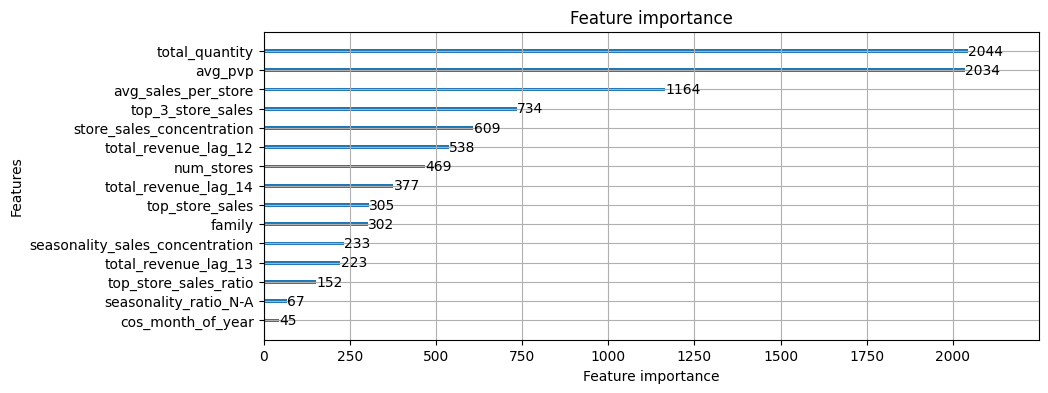

In [42]:
fc_model.plot_feature_importance()

In [28]:
def select_last_n_weeks_from_df(df, n_weeks):
    time_index = df.index
    time_mask = time_index > time_index.max() - np.timedelta64(n_weeks, "W")
    return df.loc[time_mask]

def predict_last_weeks(df, fc_model, num_weeks=54):
    """
    Predicts values for the last 13 weeks using a given forecasting model.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing historical data.
    - fc_model: The forecasting model that implements a `.predict()` method.
    - col_agg (str, optional): The column used for aggregation (default is "sku").

    Returns:
    - pd.DataFrame: A DataFrame containing the predictions for the last 13 weeks.
    """
    df_last_weeks = select_last_n_weeks_from_df(df, n_weeks=num_weeks)
    X_test, y_test = df_last_weeks.drop(columns=["y"]), df_last_weeks["y"]
    y_preds = fc_model.predict(X=X_test)
    df_preds = pd.DataFrame(
        data={
            "brand": X_test["brand"],
            "family": X_test["family"],
            "y_pred": y_preds,
            "y": y_test.values
        },
        index=X_test.index,
    )
    return df_preds

In [29]:
predictions = predict_last_weeks(df_monthly, fc_model)

In [30]:
predictions[["brand", "family"]].drop_duplicates().shape[0]

90

In [103]:
df_monthly[["brand", "family"]].drop_duplicates().shape[0]

109

In [104]:
109*12

1308

In [110]:
df_monthly[["brand", "family"]].value_counts().head(50)

brand     family                                
adidas    Camisetas Running                         49
          Mallas y pantalones Training              49
          Zapatillas de montaña                     49
Columbia  Camisetas Outdoor                         49
adidas    Zapatillas Urban                          49
          Camisetas Urban                           49
          Camisetas Training                        49
          Zapatillas Trail Running                  49
          Pantalones Urban                          49
          Zapatillas Running                        49
          Bañadores Natación                        49
          Outlet Zapatillas Urban                   48
          Outlet Calzado de montaña                 48
          Sudaderas Urban                           48
          Chándales Urban                           48
          Mallas y pantalones Running               48
          Botas de montaña                          48
          Calcet

In [50]:
family = "Camisetas Running"
brand = "adidas"
predictions[(predictions["family"] == family) & (predictions["brand"] == brand)][["y", "y_pred"]].plot()

NameError: name 'predictions' is not defined

In [51]:
df_monthly[(df_monthly["family"] == family) & (df_monthly["brand"] == brand)][["brand", "family", "y", "total_revenue_lag_12"]]

,brand,family,y,total_revenue_lag_12
date,,,,
2020-09-30,adidas,Camisetas Running,277.799988,NaN
2020-10-31,adidas,Camisetas Running,180.799988,NaN
2020-11-30,adidas,Camisetas Running,640.690002,NaN
2020-12-31,adidas,Camisetas Running,1625.590088,NaN
2021-01-31,adidas,Camisetas Running,771.950012,NaN
2021-02-28,adidas,Camisetas Running,903.930054,NaN
2021-03-31,adidas,Camisetas Running,899.989990,NaN
2021-04-30,adidas,Camisetas Running,787.989990,NaN
2021-05-31,adidas,Camisetas Running,602.000000,NaN


In [49]:
df_monthly.columns

Index(['brand', 'family', 'total_quantity', 'y', 'avg_pvp', 'num_stores',
       'store_sales_concentration', 'avg_sales_per_store', 'top_store_sales',
       'top_3_store_sales', 'top_store_sales_ratio',
       'seasonality_sales_concentration', 'mode_seasonality',
       'seasonality_ratio_FS', 'seasonality_ratio_FW', 'seasonality_ratio_M',
       'seasonality_ratio_N-A', 'seasonality_ratio_S', 'seasonality_ratio_W',
       'seasonality_change', 'year', 'month_of_year', 'sin_month_of_year',
       'cos_month_of_year', 'total_revenue_lag_12', 'total_revenue_lag_13',
       'total_revenue_lag_14'],
      dtype='object')

<Axes: xlabel='date'>

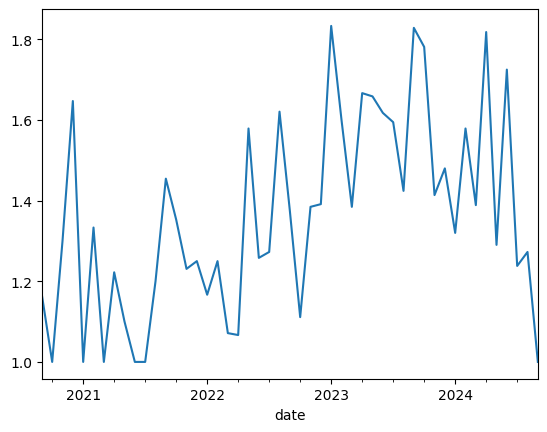

In [59]:
df_monthly[(df_monthly["family"] == family) & (df_monthly["brand"] == brand)]["avg_sales_per_store"].plot()

<Axes: xlabel='date'>

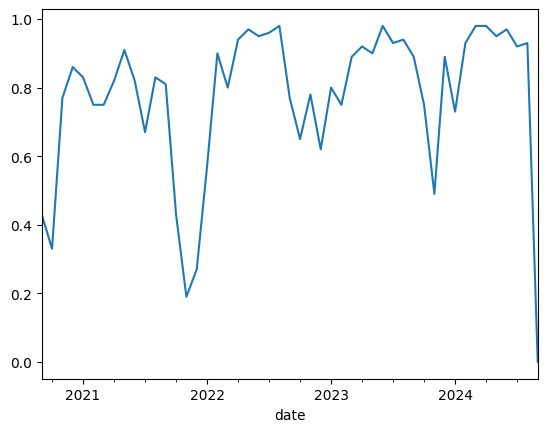

In [55]:
df_monthly[(df_monthly["family"] == family) & (df_monthly["brand"] == brand)]["seasonality_ratio_N-A"].plot()

<Axes: xlabel='date'>

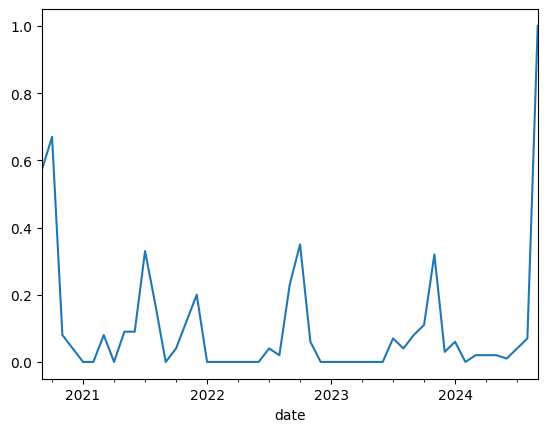

In [56]:
df_monthly[(df_monthly["family"] == family) & (df_monthly["brand"] == brand)]["seasonality_ratio_S"].plot()

<Axes: xlabel='date'>

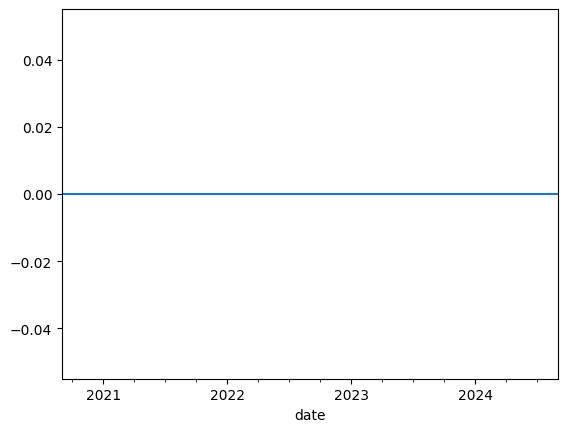

In [57]:
df_monthly[(df_monthly["family"] == family) & (df_monthly["brand"] == brand)]["seasonality_ratio_W"].plot()